Box Jenkins

8.6 Box-JenkinsThe procedure to analyze the time series used earlier in this chapter loosely follows the procedure that is commonly called the Box-Jenkins procedure [5]. The procedure is based on the following steps:Plot the data and verify that it is stationary, remove trend, if necessary. If all values are positive, consider using the logarithm of the values.Determine seasonality or periodicity from spectral analysis (Fourier transform, FFT), autocorrelation or other information, for example a-priori knowledge.Difference time series to remove seasonality and make it stationary.Determine the order of the ARMA process from autocorrelation and partial autocorrelation plot of the remaining time series.Determine the coefficients of the model.Check whether the model describes the data adequately. If the fit is unsatisfactory, possibly use more or different fit parameters.Once the model is established we can use it to forecast how the system evolves into the future.

In [2]:
#import the module for simulating data
from statsmodels.tsa.arima_process import ArmaProcess
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from datetime import datetime
from scipy.stats import norm
import sympy as sym
import statsmodels.api
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
from sklearn.linear_model import LinearRegression
from statsmodels.stats.diagnostic import het_white
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg, ar_select_order

In [4]:
df = pd.read_excel(r'/content/augmento_btc_returns.xlsx')
df.index = df['date']
df

,date,listing_close,returns,twitter_hacks,twitter_pessimistic_doubtful,twitter_banks,twitter_selling,twitter_market_manipulation,twitter_de_centralisation,twitter_angry,...,reddit_dip,reddit_launch,reddit_fomo_theme,reddit_advice_support,reddit_rebranding,reddit_wallet,reddit_good_news,reddit_problems_and_issues,reddit_mining,reddit_waiting
date,,,,,,,,,,,,,,,,,,,,,
2016-11-01 01:00:00,2016-11-01 01:00:00,706.00,NaN,0,0,0,1,0,0,0,...,0,1,0,13,0,0,4,1,3,3
2016-11-01 02:00:00,2016-11-01 02:00:00,709.99,-0.005636,1,0,0,1,0,1,0,...,0,0,0,10,0,2,1,1,0,1
2016-11-01 03:00:00,2016-11-01 03:00:00,708.54,0.002044,0,0,0,0,0,0,0,...,0,0,0,8,0,2,1,5,3,0
2016-11-01 04:00:00,2016-11-01 04:00:00,702.85,0.008063,0,0,1,0,0,0,0,...,0,0,0,4,0,1,1,0,0,0
2016-11-01 05:00:00,2016-11-01 05:00:00,708.50,-0.008007,0,0,0,0,0,0,0,...,0,0,0,3,0,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-23 11:00:00,2024-04-23 11:00:00,66064.00,0.002464,0,0,0,1,0,0,0,...,0,1,0,28,0,5,15,9,9,0
2024-04-23 12:00:00,2024-04-23 12:00:00,66137.00,-0.001104,0,0,0,0,0,0,0,...,3,1,0,33,0,8,10,5,6,1
2024-04-23 13:00:00,2024-04-23 13:00:00,66544.00,-0.006135,0,1,1,0,0,0,1,...,1,0,0,31,0,8,14,10,5,0


<Axes: title={'center': 'Price'}, xlabel='date'>

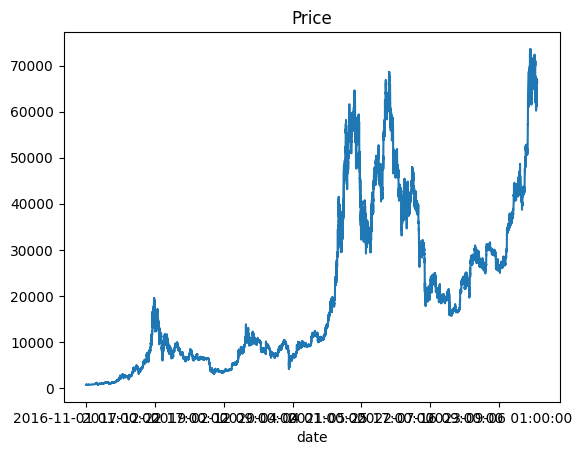

In [5]:
df['listing_close'].plot(title = 'Price')

<Axes: title={'center': 'Change in listing price'}, xlabel='date'>

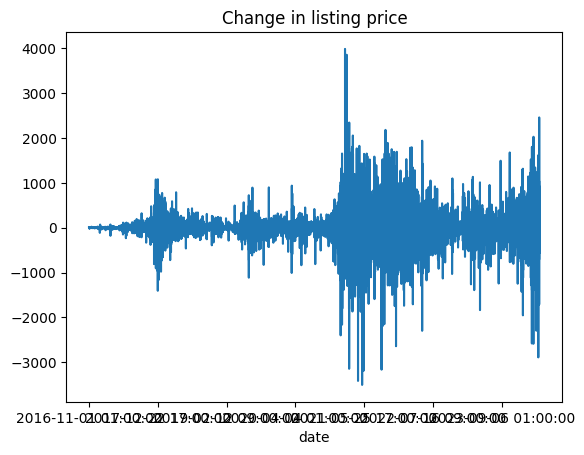

In [6]:
df['returns'] = df['listing_close'] - df['listing_close'].shift(1)
df['returns'].plot(title = 'Change in listing price')

<Axes: title={'center': 'log returns'}, xlabel='date'>

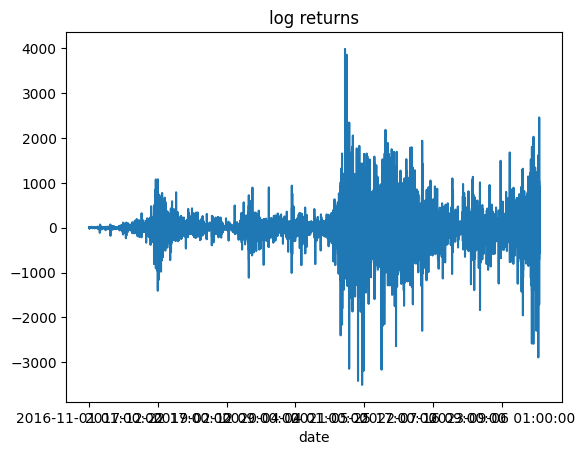

In [8]:
df['log_returns'] = (df['returns'])
df['log_returns'].plot(title = 'log returns')